## 2.8 Autocorrelation
Autocorrelation measures the linear relationship between *lagged values* of a time series. 

There are several autocorrelation coefficients, corresponding to each panel in the lag plot. For example, $r_1$ measures the relationship between $y_t$ and $y_{t-1}$, $r_2$ measures the relationship between $y_t$ and $y_{t-2}$, and so on.

The value of $r_k$ can be written as

$$
r_k = \frac{\sum_{t=k+1}^T(y_t - \bar{y})(y_{t-k}-\bar{y})}{\sum_{t=1}^T(y_t - \bar{y})^2},
$$
where $T$ is the length of the time series. The autocorrelation coefficients make up the *autocorrelation function* or ACF.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)


In [5]:
aus_production = pd.read_csv('../data/tsibbledata/aus_production.csv')
recent_production = (aus_production
    .assign(Date=pd.to_datetime(aus_production.Quarter.str.replace(' ', '')))
    .query('Date.dt.year >= 2000')
    .set_index('Date')
    )

In [12]:
import numpy as np

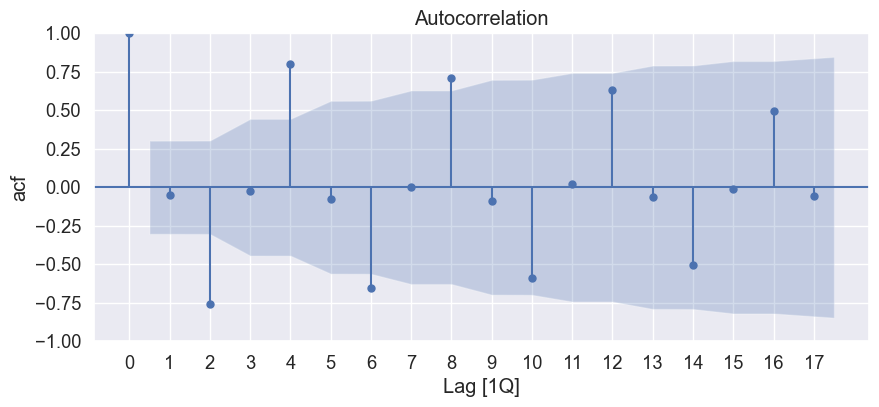

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
sm.graphics.tsa.plot_acf(recent_production.Beer, ax=ax)
ax.set(xlabel='Lag [1Q]', ylabel='acf')
ax.set_xticks(np.arange(18));

In this graph:
- $r_4$ is higher than for the other lags. This is due to the seasonal pattern in the data: the peaks tend to be four quarters apart and the troughs tend to be four quarters apart.
- $r_2$ is more negative than for the other lags because troughs tend to be two quarters behind peaks.

### Trend and seasonality in ACF plots
When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in value. So the ACF of a trended time series tends to have positive values that slowly decrease as the lags increase.

When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal period) than for other lags.

When data are both trended and seasonal, you see a combination of these effects. The `a10` data plotted Section 2.2 shows both trend and seasonality. Its ACF is shown below The slow decrease in the ACF as the lags increase is due to the trend, while the "scalloped" shape is due to the seasonality.

In [22]:
a10 = (pd.read_csv('../data/tsibbledata/PBS.csv')
    .assign(Date=lambda df: pd.to_datetime(df['Month'], format='%Y %b'))
    .query('ATC2 == "A10"')  # Filter rows where ATC2 is "A10"
    .groupby('Month', as_index=False)  # Group by Month
    .agg({'Cost': 'sum', 'Date': 'first'})
    .set_index('Date')  # Summarize total cost by month
    .assign(Cost=lambda df: df['Cost'] / 1e6)  # Convert cost to millions
)

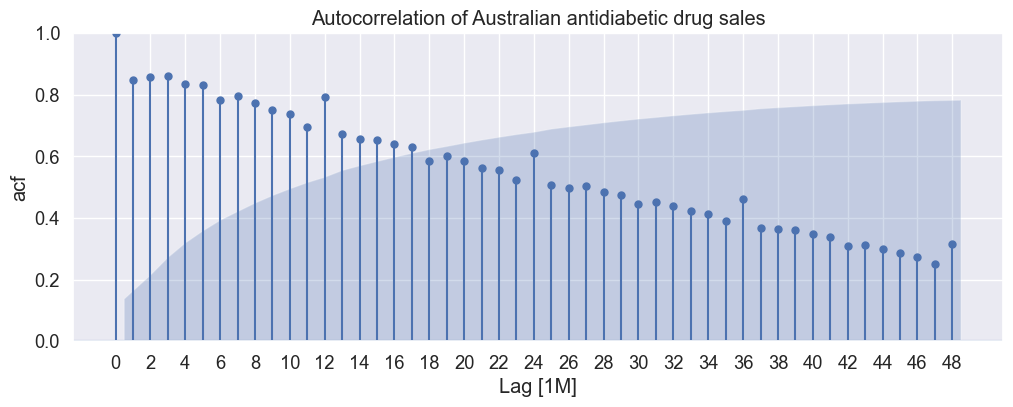

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
sm.graphics.tsa.plot_acf(a10.Cost, ax=ax, lags=48)
ax.set(xlabel='Lag [1M]', ylabel='acf', ylim=(0, 1), title='Autocorrelation of Australian antidiabetic drug sales')
ax.set_xticks(np.arange(0, 50, 2));

Note that the blue shaded area are the confidence intervals for ACF values, generally placed at 2 standard errors around $r_k$. The formula used for standard error depends upon the situation. If the autocorrelations are being used to test for randomness of residuals as part of the ARIMA routine, the standard errors are determined assuming the residuals are white noise. The approximate formula for any lag is that standard error of each $r_k = 1/\sqrt(N)$. See section 9.4 of [1] for more details on the $1/\sqrt(N)$ result. For more elementary discussion, see section 5.3.2 in [2]. For the ACF of raw data, the standard error at a lag $k$ is found as if the right model was an $MA(k-1)$. This allows the possible interpretation that if all autocorrelations past a certain lag are within the limits, the model might be an MA of order defined by the last significant autocorrelation. In this case, a moving average model is assumed for the data and the standard errors for the confidence intervals should be generated using Bartlett’s formula. For more details on Bartlett formula result, see section 7.2 in [1].

#### References
- [1] Brockwell and Davis, 1987. Time Series Theory and Methods 
- [2] Brockwell and Davis, 2010. Introduction to Time Series and Forecasting, 2nd edition.